<a href="https://colab.research.google.com/github/rfb0408/python_data_analyst_study/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A7%91%EB%8B%A8%ED%99%94_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 집단화: Groupby
판다스(Pandas)의 groupby 함수는 데이터를 그룹별로 분할하고, 각 그룹에 대해 집계, 변환, 필터링 등의 연산을 적용하는 데 사용됩니다. groupby는 데이터 분석에서 중요한 도구 중 하나로, SQL의 GROUP BY와 유사한 기능을 제공합니다.

In [1]:
import pandas as pd
import numpy as np

### 1. 기술 통계 함수
* count: 각 열이나 행의 비결측치(non-NA/null) 개수를 반환합니다.
* sum: 값의 합계를 계산합니다.
* mean: 평균 값을 계산합니다.
* median: 중앙값을 계산합니다.
* min / max: 최소값 또는 최대값을 계산합니다.
* std / var: 표준편차(standard deviation) 또는 분산(variance)을 계산합니다.
* describe: 여러 기술 통계량을 한 번에 제공합니다(개수, 평균, 표준 편차, 최소값, 25/50/75 백분위수, 최대값)
* quantile: 데이터의 분위수(quantile)를 계산합니다.
* idxmax/idxmin: 데이터프레임이나 시리즈에서 최대값/최소값을 가지는 인덱스를 반환합니다.

In [26]:
df = pd.read_csv("gapminder.tsv",sep='\t')

year=df['year']
year.count()

1704

In [4]:
s = pd.Series([7,17,777,177,71])
s.idxmax() #최댓값 위치 찾기

2

### 2. 상관관계 및 공분산 함수
* corr: 열 간의 상관 계수(correlation coefficient)를 계산합니다.
* cov: 열 간의 공분산(covariance)을 계산합니다.

In [5]:
# 상관계수 : -1~1
# 절댓값이 1에 가까울 수록 관계높음
# 0.3 -0.3 을 넘어가면 상관관계가 있다고 봄

df.corr()

<ipython-input-5-cf9e21505bdd>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,lifeExp,pop,gdpPercap
year,1.000000,0.435611,0.082308,0.227318
lifeExp,0.435611,1.000000,0.064955,0.583706
pop,0.082308,0.064955,1.000000,-0.025600
gdpPercap,0.227318,0.583706,-0.025600,1.000000


In [6]:
df['lifeExp'].corr(df['gdpPercap'])

0.5837062198659807

In [7]:
df['lifeExp'].cov(df['gdpPercap'])

74323.19574798533

### 3. 기타 통계적 방법
* cumsum: 누적합(cumulative sum)을 계산합니다.
* cumprod: 누적곱(cumulative product)을 계산합니다.
* cummax / cummin: 누적 최대값(cumulative maximum) 또는 누적 최소값(cumulative minimum)을 계산합니다.
* diff: 1차 차분(first difference)을 계산합니다. 시계열 데이터에서 유용합니다.
* pct_change: 각 요소의 백분율 변화율을 계산합니다.

In [8]:
samsung= pd.read_excel("samsung.xlsx")
samsung

,Date,Open,High,Low,Close,Volume
0,36412,4760,4820,4619,4760,1093878
1,36413,4700,4790,4630,4630,1231084
2,36416,4800,5030,4720,5000,1531271
3,36417,4900,4970,4720,4740,1096282
4,36418,4780,4810,4660,4660,709764
...,...,...,...,...,...,...
5995,45281,74600,75000,74300,75000,13478766
5996,45282,75800,76300,75400,75900,14515608
5997,45286,76100,76700,75700,76600,13164909
5998,45287,76700,78000,76500,78000,20651042


In [9]:
samsung['cumsum']=samsung['Close'].cumsum()
samsung['cumprod']=samsung['Close'].cumprod()
samsung['cummax']=samsung['Close'].cummax()
samsung['cummin']=samsung['Close'].cummin()
samsung['DIFF']=samsung['Close'].diff()
samsung['Close'].pct_change()*100

0            NaN
1      -2.731092
2       7.991361
3      -5.200000
4      -1.687764
          ...   
5995    0.267380
5996    1.200000
5997    0.922266
5998    1.827676
5999    0.641026
Name: Close, Length: 6000, dtype: float64

### 4. Groupby 기본 작동 원리
1. 분할(Split): 데이터를 특정 기준에 따라 여러 그룹으로 분할합니다.
2. 적용(Apply): 각 그룹에 대해 함수(집계, 변환, 필터링 등)를 적용합니다.
3. 결합(Combine): 함수의 결과를 하나의 데이터 구조로 결합합니다.

In [12]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [11]:
df.groupby("year") # 데이터를 그룹화한다!

In [13]:
a= df.groupby("year")['lifeExp'].mean()
a

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

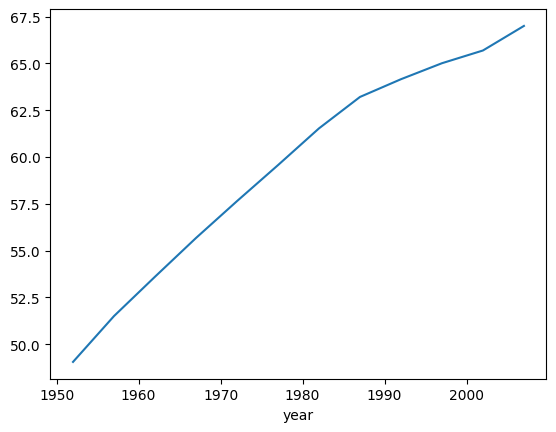

In [14]:
a.plot()

In [15]:
b =df.groupby(["year","continent"])['lifeExp'].mean()
b

year  continent
1952  Africa       39.135500
      Americas     53.279840
      Asia         46.314394
      Europe       64.408500
      Oceania      69.255000
1957  Africa       41.266346
      Americas     55.960280
      Asia         49.318544
      Europe       66.703067
      Oceania      70.295000
1962  Africa       43.319442
      Americas     58.398760
      Asia         51.563223
      Europe       68.539233
      Oceania      71.085000
1967  Africa       45.334538
      Americas     60.410920
      Asia         54.663640
      Europe       69.737600
      Oceania      71.310000
1972  Africa       47.450942
      Americas     62.394920
      Asia         57.319269
      Europe       70.775033
      Oceania      71.910000
1977  Africa       49.580423
      Americas     64.391560
      Asia         59.610556
      Europe       71.937767
      Oceania      72.855000
1982  Africa       51.592865
      Americas     66.228840
      Asia         62.617939
      Europe       72.80640

In [20]:
import pandas as pd


data = {'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'A'],
        'Values': [10, 20, 15, 30, 25, 35, 45, 50]}

df = pd.DataFrame(data)
df

,Category,Values
0,A,10
1,B,20
2,A,15
3,C,30
4,B,25
5,A,35
6,C,45
7,A,50


#### 4-1. 집계(Aggregation)
* sum(), mean(), max(), min() 등의 함수를 사용하여 그룹별로 데이터를 집계합니다.

In [21]:
a=df.groupby("Category")
a.groups

{'A': [0, 2, 5, 7], 'B': [1, 4], 'C': [3, 6]}

In [22]:
a.sum()

,Values
Category,
A,110
B,45
C,75


#### 4-2. 변환(Transformation)
* transform() 함수를 사용하여 그룹별로 데이터를 변환합니다.

In [23]:
a["Values"].transform(lambda x : x-x.mean())

0   -17.5
1    -2.5
2   -12.5
3    -7.5
4     2.5
5     7.5
6     7.5
7    22.5
Name: Values, dtype: float64

#### 4-3. 필터링(Filtering)
* filter() 함수를 사용하여 조건에 따라 데이터를 필터링합니다.

In [24]:
a.filter(lambda x : x['Values'].sum()>100)

,Category,Values
0,A,10
2,A,15
5,A,35
7,A,50


#### 4-4. 복합 연산
* agg 메소드를 통해 여러 함수를 연쇄적으로 적용할 수 있습니다.

In [28]:
#연도별로 국가별로 기대수명은 평균과 중앙값을 보고싶다
#인구수는 최대 최소값을 보고싶다
#1인당 gdp는 평균만 보고싶다
df = pd.read_csv("gapminder.tsv",sep='\t')

df.groupby(["year","country"]).agg({'lifeExp':['mean','median'],
                                'pop' : ['max','min'],
                                "gdpPercap" : "mean"})

lifeExp               pop              gdpPercap
                           mean  median       max       min         mean
year country                                                            
1952 Afghanistan         28.801  28.801   8425333   8425333   779.445314
     Albania             55.230  55.230   1282697   1282697  1601.056136
     Algeria             43.077  43.077   9279525   9279525  2449.008185
     Angola              30.015  30.015   4232095   4232095  3520.610273
     Argentina           62.485  62.485  17876956  17876956  5911.315053
...                         ...     ...       ...       ...          ...
2007 Vietnam             74.249  74.249  85262356  85262356  2441.576404
     West Bank and Gaza  73.422  73.422   4018332   4018332  3025.349798
     Yemen, Rep.         62.698  62.698  22211743  22211743  2280.769906
     Zambia              42.384  42.384  11746035  11746035  1271.211593
     Zimbabwe            43.487  43.487  12311143  12311143   469.709298

[1704 rows x 5 columns]

In [29]:
df.groupby(["year","country"])[['lifeExp','pop','gdpPercap']].agg(('mean','median'))

lifeExp                 pop                gdpPercap  \
                           mean  median        mean      median         mean   
year country                                                                   
1952 Afghanistan         28.801  28.801   8425333.0   8425333.0   779.445314   
     Albania             55.230  55.230   1282697.0   1282697.0  1601.056136   
     Algeria             43.077  43.077   9279525.0   9279525.0  2449.008185   
     Angola              30.015  30.015   4232095.0   4232095.0  3520.610273   
     Argentina           62.485  62.485  17876956.0  17876956.0  5911.315053   
...                         ...     ...         ...         ...          ...   
2007 Vietnam             74.249  74.249  85262356.0  85262356.0  2441.576404   
     West Bank and Gaza  73.422  73.422   4018332.0   4018332.0  3025.349798   
     Yemen, Rep.         62.698  62.698  22211743.0  22211743.0  2280.769906   
     Zambia              42.384  42.384  11746035.0  11746035.0  1271.211593   
     Zimbabwe            43.487  43.487  12311143.0  12311143.0   469.709298   

                                      
                              median  
year country                          
1952 Afghanistan          779.445314  
     Albania             1601.056136  
     Algeria             2449.008185  
     Angola              3520.610273  
     Argentina           5911.315053  
...                              ...  
2007 Vietnam             2441.576404  
     West Bank and Gaza  3025.349798  
     Yemen, Rep.         2280.769906  
     Zambia              1271.211593  
     Zimbabwe             469.709298  

[1704 rows x 6 columns]

* apply 함수는 각 그룹에 복잡한 연산을 적용할 때 사용됩니다.

In [30]:
def my_func(x):
    return x.max()-x.min() #range

#연도별로 기대수명의 범위
df.groupby("year")["lifeExp"].apply(my_func)

year
1952    43.869
1957    43.138
1962    41.683
1967    40.140
1972    39.320
1977    44.890
1982    38.665
1987    38.764
1992    55.761
1997    44.603
2002    42.807
2007    42.990
Name: lifeExp, dtype: float64

In [31]:
# 대륙별로 연도별로 인구 변화(증가량)을 계산하고 시각화

a=df.groupby(["continent","year"])["pop"].sum()
a.to_excel("result.xlsx")

b=a.groupby("continent").diff().reset_index()
b

,continent,year,pop
0,Africa,1952,NaN
1,Africa,1957,27197237.0
2,Africa,1962,31679127.0
3,Africa,1967,38772624.0
4,Africa,1972,44590052.0
5,Africa,1977,53181480.0
6,Africa,1982,66287566.0
7,Africa,1987,75485523.0
8,Africa,1992,84247407.0
9,Africa,1997,84751467.0


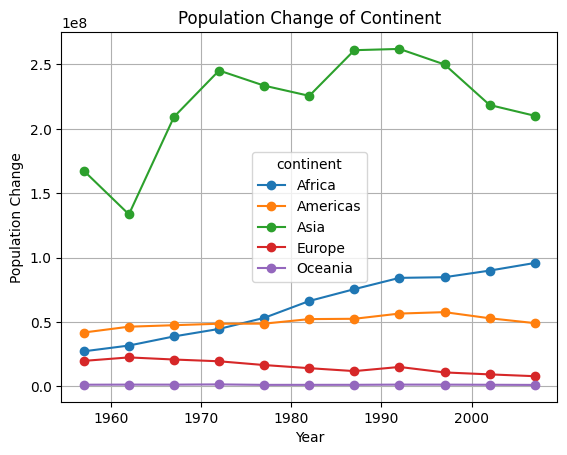

In [32]:
# 내가 원하는 행과 열을 설정해서 집계값

import matplotlib.pyplot as plt

table =b.pivot_table(index='year',columns='continent',values='pop')
table.plot(kind='line',marker='o')
plt.title("Population Change of Continent")
plt.ylabel("Population Change")
plt.xlabel("Year")
plt.grid()
plt.show()